<h2 style="text-align:center;">📊 Multiple Linear Regression (MLR) - Investment Dataset</h2>

This notebook demonstrates **Multiple Linear Regression (MLR)** using the **Investment dataset**.  
We will go through the following steps:

1. Import required libraries  
2. Load and explore the dataset  
3. Prepare independent (X) and dependent (y) variables 
4. Encoding categorical variables   
5. Train-Test Split  
6. Train the Multiple Linear Regression model  
7. Evaluate model performance  
8. Perform **Backward Elimination** (feature selection using p-values)  

---


<h2 style="text-align:center;">📦 Step 1: Import Required Libraries</h2>

We first import the libraries needed for:
- **Data Handling** → NumPy, Pandas  
- **Machine Learning** → scikit-learn (LinearRegression, train_test_split)  
- **Statistical Analysis** → statsmodels (for backward elimination)  


In [14]:
# ------------------------------
# Import necessary libraries
# ------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle
import os


# For train-test split and regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# For backward elimination
import statsmodels.api as sm


<h2 style="text-align:center;">📂 Step 2: Load & Explore the Dataset</h2>

We will:
1. Load the **Investment dataset** (CSV file).  
2. Display the first few rows.  
3. Check dataset information (columns, datatypes, nulls).  
4. Get statistical summary to understand data distribution.  


In [2]:
# ------------------------------
# Load the dataset
# ------------------------------
DATA_PATH = "../data/Investment.csv"   # relative path

df = pd.read_csv(DATA_PATH)

# Display first 5 rows
print("🔹 First 5 rows of dataset:")
display(df.head())

# Dataset info
print("\n🔹 Dataset Info:")
print(df.info())

# Statistical summary
print("\n🔹 Statistical Summary:")
display(df.describe())


🔹 First 5 rows of dataset:


,DigitalMarketing,Promotion,Research,State,Profit
0,165349.20,136897.80,471784.10,Hyderabad,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Chennai,191050.39
3,144372.41,118671.85,383199.62,Hyderabad,182901.99
4,142107.34,91391.77,366168.42,Chennai,166187.94



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DigitalMarketing  50 non-null     float64
 1   Promotion         50 non-null     float64
 2   Research          50 non-null     float64
 3   State             50 non-null     object 
 4   Profit            50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

🔹 Statistical Summary:


,DigitalMarketing,Promotion,Research,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<h2 style="text-align:center;">🎯 Step 3: Define Independent & Dependent Variables</h2>

- **Independent variables (X):** All columns except the last (`Profit`).  
- **Dependent variable (y):** Target column (`Profit`).
Here,  
- `X` = all columns **except last**  
- `y` = last column (Profit)  


In [3]:
# ------------------------------
# Separate Independent (X) and Dependent (y) variables
# ------------------------------

X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, 4]     # Profit column

print("🔹 Shape of X:", X.shape)
print("🔹 Shape of y:", y.shape)

# Display first 5 rows of X and y
print("\nIndependent Variables (X):")
display(X.head())

print("\nDependent Variable (y):")
display(y.head())


🔹 Shape of X: (50, 4)
🔹 Shape of y: (50,)

Independent Variables (X):


,DigitalMarketing,Promotion,Research,State
0,165349.20,136897.80,471784.10,Hyderabad
1,162597.70,151377.59,443898.53,Bangalore
2,153441.51,101145.55,407934.54,Chennai
3,144372.41,118671.85,383199.62,Hyderabad
4,142107.34,91391.77,366168.42,Chennai



Dependent Variable (y):


0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

<h2 style="text-align:center;">Step 4: Handle Categorical Variables</h2>

The column **State** is categorical, so we need to convert it into dummy variables using **One-Hot Encoding**.


In [4]:
# Convert categorical 'State' into dummy variables
X = pd.get_dummies(X, dtype=int)  

X.head()


,DigitalMarketing,Promotion,Research,State_Bangalore,State_Chennai,State_Hyderabad
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


<h2 style="text-align:center;">Step 5: Train-Test Split</h2>

We will split the dataset into **80% training** and **20% testing** using `train_test_split`.


In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (40, 6)
Test set shape: (10, 6)


<h2 style="text-align:center;">Step 6: Fit Multiple Linear Regression Model</h2>

We will now fit a **Linear Regression model** using sklearn.


In [6]:
# Initialize and train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Display coefficients and intercept
print("Coefficients (m):", regressor.coef_)  # ➤ slope for each feature
print("Intercept (c):", regressor.intercept_)  # ➤ constant term

Coefficients (m): [ 7.73467193e-01  3.28845975e-02  3.66100259e-02  8.66383692e+01
 -8.72645791e+02  7.86007422e+02]
Intercept (c): 42467.52924855314


<h2 style="text-align:center;">Step 6 (continued): Visualizing Predictions</h2>

We will compare the **actual vs predicted values** of Profit on the test set.


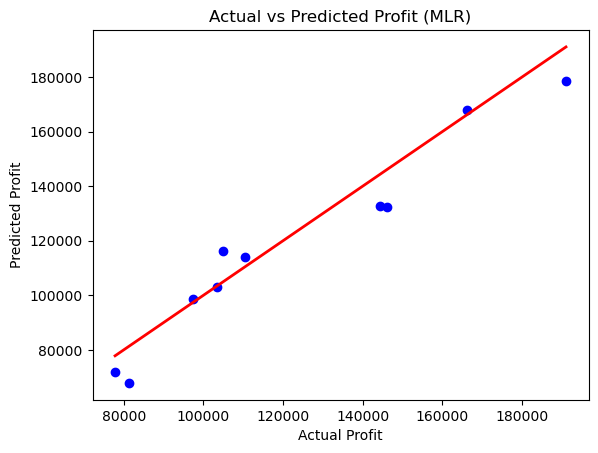

In [13]:
# ------------------------------
# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (MLR)")
plt.show()


<h2 style="text-align:center;">Step 7: Backward Elimination</h2>

We will use **Statsmodels** to apply Backward Elimination:
1. Start with all predictors.  
2. Remove the variable with the highest **p-value** (if > 0.05).  
3. Repeat until only significant predictors remain.  


In [7]:
# Add a constant column for intercept
X_with_const = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values=X.values, axis=1)

# Step 1: Start with all predictors
X_opt = X_with_const[:, [0, 1, 2, 3, 4, 5]]  # indices depend on dataset
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           1.34e-27
Time:                        14:51:58   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.0

<h3>Iteration 2: Remove Highest p-value Feature</h3>


In [8]:
# Iteration 2
X_opt = X_with_const[:, [0, 1, 2, 3, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           8.49e-29
Time:                        14:53:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.0

<h3>Iteration 3: Remove Next Highest p-value Feature</h3>


In [9]:
# Iteration 3
X_opt = X_with_const[:, [0, 1, 2, 3]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           4.53e-30
Time:                        14:53:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

<h3>Iteration 4: Further Feature Removal</h3>


In [10]:
# Iteration 4
X_opt = X_with_const[:, [0, 1, 3]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           2.16e-31
Time:                        14:54:27   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

<h3>Final Iteration: Optimal Model</h3>


In [11]:
# Final iteration
X_opt = X_with_const[:, [0, 1]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           3.50e-32
Time:                        14:54:49   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

<h2 style="text-align:center;">Last-Step: Save the Trained MLR Model</h2>

In this step, we will save the trained Multiple Linear Regression model into a `.pkl` file using the `pickle` library.  
This saved model will later be used in our Streamlit frontend application for real-time predictions.


In [15]:
# ------------------------------
# Save the trained MLR model
# ------------------------------

# Create models directory if it doesn't exist
os.makedirs("../models", exist_ok=True)

MODEL_PATH = "../models/multiple_linear_regression_model.pkl"

# Save the regressor (trained Linear Regression model)
with open(MODEL_PATH, "wb") as file:
    pickle.dump(regressor, file)

print(f"✅ Model saved successfully at: {MODEL_PATH}")


✅ Model saved successfully at: ../models/multiple_linear_regression_model.pkl


<h2 style="text-align:center;">📌 Conclusion & Key Takeaways</h2>

- **Multiple Linear Regression (MLR)** was applied on the *Investment dataset* to predict `Profit` based on features like `DigitalMarketing`, `Promotion`, `Research`, and `State`.  
- Using **scikit-learn**, we trained the model and evaluated it with metrics like **R²** and **Mean Squared Error (MSE)**.  
- Model coefficients gave us insight into how each feature influences `Profit`.  
- We then applied **Backward Elimination (OLS with statsmodels)** for feature selection:
  - Started with all features.
  - Iteratively removed predictors with the highest **p-values (> 0.05)**.
  - Retained only statistically significant variables in the final model.  

✅ **Key Learning Points:**  
1. MLR can handle multiple predictors at once.  
2. Feature selection is crucial — not all predictors contribute meaningfully.  
3. **OLS summary** helps in interpreting feature significance beyond prediction accuracy.  

🚀 With this, we now understand both the **practical machine learning workflow** and the **statistical interpretation** of regression models.  
